In [1]:
import requests
from PIL import Image
import io
import base64

In [2]:
def base64_to_pil(image_base64: str) -> Image:
    return Image.open(io.BytesIO(base64.decodebytes(bytes(image_base64, "utf-8")))).convert('RGB')

In [5]:
# для Linux: url='http://0.0.0.0:8000/a_b_label_predict'
# для Windows: url='http://127.0.0.1:8000/a_b_label_predict'

response = requests.post(url='http://127.0.0.1:8000/pair_images/predict',
                        data={
                            "user_label": "КАПУСТА БЕЛОКОЧАННАЯ"
                        },
                        files={
                            "file_a": open('test_images/cabbage/A.png', 'rb'),
                            "file_b": open('test_images/cabbage/B.png', 'rb')
                        })

In [7]:
# model_answer: указанный товар действительно оказался на кассе самообслуживания - 1, указанный товар не оказался на кассе самообслуживания - 0

response.json()['product_class']

1

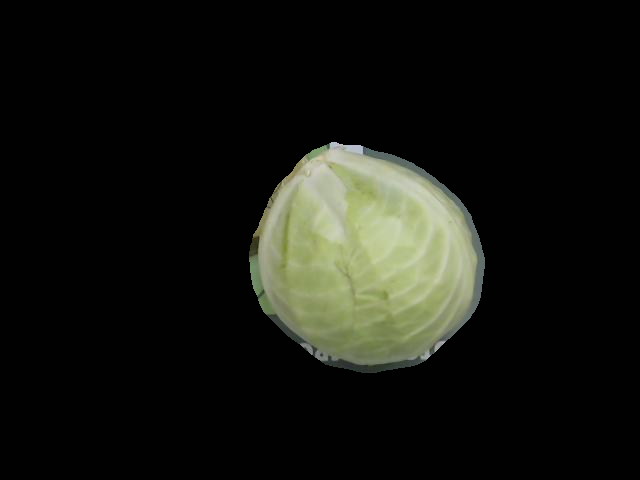

In [9]:
# img_with_mask: маска модели сегментации изменений, закодированная в base64

base64_to_pil(response.json()['mask_base_64'])